In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
df=pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df['AgeCategory']=df['AgeCategory'].replace(['18-24','25-29'],'Young')
df['AgeCategory']=df['AgeCategory'].replace(['30-34','35-39','40-44','45-49'],'Adult')
df['AgeCategory']=df['AgeCategory'].replace(['50-54','55-59','60-64','65-69'],'Old')
df['AgeCategory']=df['AgeCategory'].replace(['70-74','75-79','80 or older'],'Very Old')

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [10]:
y = df.iloc[:, 0]  # Assuming the first column is the target variable
X = df.iloc[:, 1:]  # Selecting all columns except the first column
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,1,8.0,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,1,8.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,0,6.0,...,0,0,0,1,0,0,1,0,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,1,5.0,...,0,1,0,0,0,0,0,0,0,1
319792,24.24,0,0,0,0.0,0.0,0,0,1,6.0,...,0,1,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,0,12.0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf_classifier = RandomForestClassifier(random_state=42)

In [14]:
rf_classifier.fit(X_train_scaled, y_train)


y_pred = rf_classifier.predict(X_test_scaled)


tr_accuracy = rf_classifier.score(X_train_scaled, y_train)


ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.44%
Test Accuracy: 88.49000000000001%


Confusion Matrix:


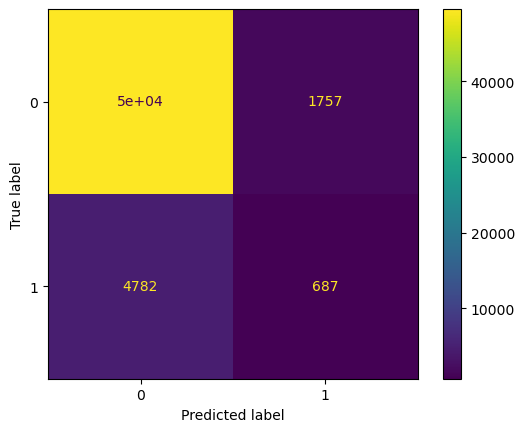

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     51324
           1       0.28      0.13      0.17      5469

    accuracy                           0.88     56793
   macro avg       0.60      0.55      0.56     56793
weighted avg       0.85      0.88      0.86     56793



In [15]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))